In [334]:
#https://github.com/ofajardo/pyreadr
#!pip install pyreadr
#!pip install -U pip setuptools
#!pip install feather-format

import random
import pyreadr
import os
import pandas as pd
import numpy as np 
import feather
import decimal
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

'''
Script to generate simulation experiment results. 

'''

'\nScript to generate simulation experiment results. \n\n'

In [335]:
#download experimental data; 
#original source: Kosuke Imai; Michael Lingzhi Li, 2021, "Replication Data for: Experimental Evaluation of Individualized Treatment Rules", https://doi.org/10.7910/DVN/YCYTOB, Harvard Dataverse, V1

'''
* `Z`: A binary treatment (PSA provision)
* `D`: An ordinal decision (judge's release decision)
* `Y`: An outcome (FTA)
* Pre-treatment covariates: `Sex`, `White`, `SexWhite`, `Age`, `NCorNonViolentMisdemeanorCharge`, `ViolentMisdemeanorCharge`, `NonViolentFelonyCharge`, `ViolentFelonyCharge`, `PendingChargeAtTimeOfOffense`, `PriorMisdemeanorConviction`, `PriorFelonyConviction`, `PriorViolentConviction`, `PriorSentenceToIncarceration`, `PriorFTAInPastTwoYears`, `PriorFTAOlderThanTwoYears`, and `Staff_ReleaseRecommendation`.

See the table below for the details of the pre-treatment covariates:

| Variables | Description |
|:---------|:---------|
|`Sex`|male (1) or female (0)|
|`White`|white (1)or non-white (0)|
|`SexWhite`|the interaction between `Sex` and `White`|
|`Age`|age|
|`NCorNonViolentMisdemeanorCharge`| binary variable for current NC (parole violations) or non-violent misdemeanor charge|
|`ViolentMisdemeanorCharge`| binary variable for current violent misdemeanor charge|
|`NonViolentFelonyCharge`| binary variable for current non-violent felony charge|
|`ViolentFelonyCharge`| binary variable for current violent felony charge|
|`PendingChargeAtTimeOfOffense`|binary variable for pending charge (felony, misdemeanor, or both) at the time of offense|
|`PriorMisdemeanorConviction`|binary variable for prior conviction of misdemeanor|
|`PriorFelonyConviction`|binary variable for prior conviction of felony|
|`PriorViolentConviction`|four-level ordinal variable for prior violent conviction ($0,1,2$ and $3$, where $3$ indicates the counts of three or more)|
|`PriorSentenceToIncarceration`|binary variable for prior sentence to incarceration|
|`PriorFTAInPastTwoYears`|three-level ordinal variable for FTAs from past two years ($0,1$ and $2$ where $2$ indicates the counts of two or more)|
|`PriorFTAOlderThanTwoYears`|binary variable for FTAs from over two years ago|
|`Staff_ReleaseRecommendation`|four-level ordinal variable for the DMF recommendation|

'''
data_folder = "data_src/aihuman/data"
tot_res = list()

for filename in os.listdir(data_folder):
    f = data_folder+"/"+filename
    if ".rda" in f:
        result =pyreadr.read_r(f)
        tot_res.append(result) 

df_list = list()
ref_dict = dict()

for item in tot_res:
    for k, v in item.items():
        # print key and value
        ref_dict[k] = v



In [336]:
#turn data files into a single dataframe summarizing results

#ref_dict.keys() #index of each data file in data folder
ref_dict['NCAdata'] = ref_dict['NCAdata'].rename(columns={"Y": "Y_NCA"})
ref_dict['NVCAdata'] = ref_dict['NVCAdata'].rename(columns={"Y": "Y_NVCA"})
ref_dict['FTAdata'] = ref_dict['FTAdata'].rename(columns={"Y": "Y_FTA"})

res_df = pd.concat([ref_dict['PSAdata'],ref_dict['NCAdata']], axis = 1)
res_df["Y_NVCA"] = ref_dict['NVCAdata']["Y_NVCA"]
res_df["Y_FTA"] = ref_dict['FTAdata']["Y_FTA"]
res_df["Hearing Date"] = ref_dict['HearingDate']
res_df = res_df.loc[:,~res_df.columns.duplicated()].copy()
res_df.to_csv("exp_summary.csv")

#res_df["Hearing Date"].nunique() -- Note: Experimental results for 274 dates ; 1891 cases 

In [337]:
res_df_exp_data = pd.read_csv("exp_summary.csv") #-- access results for dataframe
res_df_exp_data

,Unnamed: 0,Z,D,FTAScore,NCAScore,NVCAFlag,DMF,Sex,White,SexWhite,...,PriorFelonyConviction,PriorViolentConviction,PriorSentenceToIncarceration,PriorFTAInPastTwoYears,PriorFTAOlderThanTwoYears,Staff_ReleaseRecommendation,Y_NCA,Y_NVCA,Y_FTA,Hearing Date
0,0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2
1,1,1.0,1.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,2
2,2,1.0,2.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,4
3,3,1.0,0.0,5.0,4.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,1.0,1
4,4,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,1886,0.0,0.0,3.0,5.0,0.0,1.0,1.0,0.0,0.0,...,1.0,2.0,1.0,0.0,1.0,4.0,1.0,0.0,0.0,261
1887,1887,0.0,2.0,6.0,6.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,6.0,0.0,0.0,0.0,270
1888,1888,0.0,0.0,5.0,5.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,251
1889,1889,1.0,1.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0,...,1.0,3.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,271


0.4952669779744309


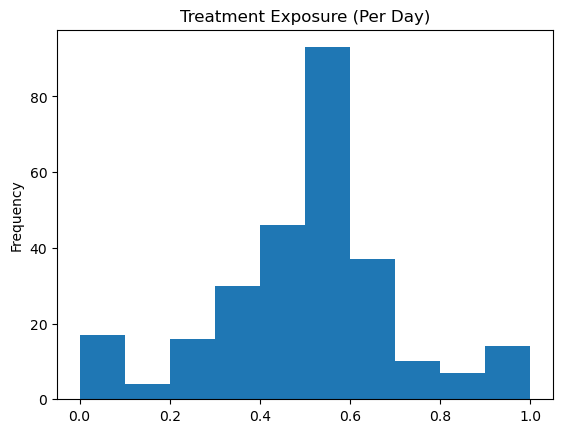

In [357]:
df_h = pd.DataFrame()

df = res_df_exp_data

df_treatment = df.groupby(df["Hearing Date"])['Z'].agg(['sum', 'mean', 'max'])

df_plot = df_treatment["mean"]

#df_h["Z_mean"] = df_treatment["mean"]
#df_h['Hearing Date'] = df_treatment["mean"].index


#df_plot = pd.DataFrame({'Hearing Date': df_treatment["Hearing Date"], 'Mean':  df_treatment['mean']})

plot = df_plot.plot(kind='hist', title="Treatment Exposure (Per Day)")
#df_plot

#for each day, we have treatment exposure -- culmulative avg treatment expsoure, and "on that day" avg treatment exposure 
#look at avg judge disagreement for the same day? indv judge disagreement for next treated case? avg judge disagreement for next day? 
# look at correlation -- hypothesis: if the judge hasn't seen the score in a while, the next time they see a treated case, then they have a higher rate of disagreemnt

#do statistical test on the correlation to see if significant?

#print(df_h)
print(df_treatment["mean"].mean())

plt.savefig('Figs/treatment_exp_per_day.png', bbox_inches='tight')

In [339]:
df_comp = normalize_agreement(df)


df_comp = df_comp.groupby(df_comp["Hearing Date"])['C']



In [340]:
def normalize_agreement(df):
    '''
    A -- Looking at how many decisions the judges make that agree with the recommended value (whether they see it or not)
    C -- Looking at how many decisions the judges make that agree with the recommended value (only when treated) 
    '''
    df = df.copy()
    C_list = list()
    A_list = list() 
    UA_list = list() 

    for index, row in df.iterrows():
        if row["D"] >= 1 and row["DMF"] >= 1:
            A=1.0
            if row["Z"] == 1:
                C=1.0
                UA = np.nan
            elif row["Z"] == 0:
                C = np.nan
                UA=1.0
        elif row["D"] == 0 and row["DMF"] == 0:
            A=1.0
            if row["Z"] == 1:
                C=1.0
                UA = np.nan
            elif row["Z"] == 0:
                C = np.nan
                UA=1.0
        else:
            A=0.0
            if row["Z"] == 1:
                C=0.0
                UA = np.nan
            elif row["Z"] == 0:
                C = np.nan
                UA=0.0
        '''
        #complaince should only apply for treated cases (when they see it)
        if row["Z"] == 1: 
            if row["D"] >= 1 and row["DMF"] == 1:
                C=1.0
            elif row["D"] == 0 and row["DMF"] == 0:
                C=1.0
            else:
                C=0.0
        else: #did not see DMF and so non-compliance not applicable 
            C = np.nan
            

        if row["D"] >= 1 and row["DMF"] >= 1:
            A=1.0
        elif row["D"] == 0 and row["DMF"] == 0:
            A=1.0
        else:
            A=0.0
        '''    
        C_list.append(C)
        A_list.append(A)
        UA_list.append(UA)
      
    #set a normalized outcome 
    df["C"] = C_list
    df["A"] = A_list
    df["UA"] = UA_list

    return df 

#set threshold; if complaince rate is > 1, and if treatment exposure is > 1 

-0.1767964524386981
0.6589502954466459


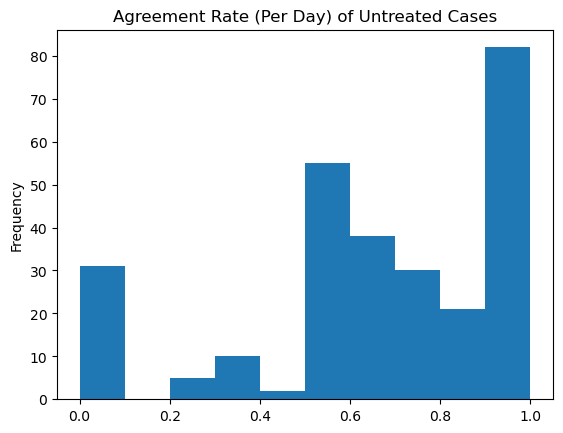

In [354]:
df_norm3 = normalize_agreement(df)

df_uagg = df_norm3.groupby(df_norm3["Hearing Date"])['UA'].agg(lambda x: list(x.dropna())) #lambda x: list(x.dropna())

#manually calculate mean 
df_uagg["mean"] = df_uagg.apply(lambda x: np.mean(x))
df_uagg["mean"] = df_uagg["mean"].fillna(0.0)
df_plot3 = df_uagg["mean"]
#df_comp["mean"] = df_comp.apply(lambda x: list(x.dropna()))

plot3 = df_plot3.plot(kind='hist', title="Agreement Rate (Per Day) of Untreated Cases")
corr_uagg = pd.concat([df_treatment["mean"], df_uagg["mean"]], axis=1)
corr_uagg.columns = ["mean_treatment","mean_agreement_untreated"]
#corr_plot_uagg = corr_uagg.plot(style=".")
print(corr_uagg["mean_treatment"].corr(corr_uagg["mean_agreement_untreated"])) #-0.1767964524386981; t-test 
 
print(df_uagg["mean"].mean()) #0.6589502954466459, agreement untreated 

#variance 

plt.savefig('Figs/agreement_per_day_untreated.png', bbox_inches='tight')

0.10950177458483214
0.7122412168656885


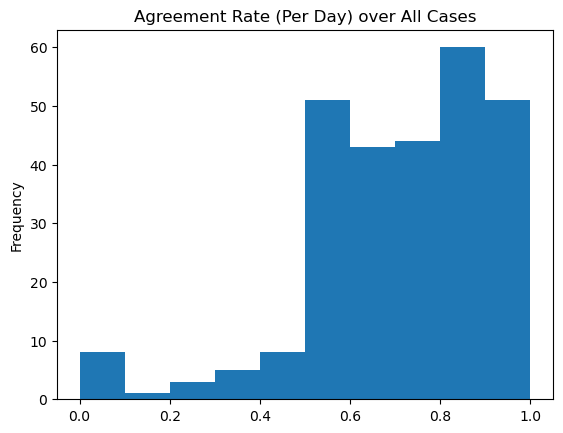

In [355]:
df_norm = normalize_agreement(df)

df_agg = df_norm.groupby(df_norm["Hearing Date"])['A'].agg(['sum', 'mean', 'max'])

df_plot_agg = df_agg["mean"]
#df_h["Z_mean"] = df_treatment["mean"]
#df_h['Hearing Date'] = df_treatment["mean"].index
#df_plot = pd.DataFrame({'Hearing Date': df_treatment["Hearing Date"], 'Mean':  df_treatment['mean']})

plot_agg = df_plot_agg.plot(kind='hist', title="Agreement Rate (Per Day) over All Cases")



corr_comp_agg = pd.concat([df_treatment["mean"], df_agg["mean"]], axis=1)
corr_comp_agg.columns = ["mean_treatment","mean_agreement"]
#corr_plot_agg = corr_comp_agg.plot(style=".")
print(corr_comp_agg["mean_treatment"].corr(corr_comp_agg["mean_agreement"])) #0.10950177458483214 ; t-test ?

print(df_agg["mean"].mean()) #0.7122412168656885, total 

plt.savefig('Figs/agreement_per_day_total.png', bbox_inches='tight')

0.25623139939355877
0.24142788800651171
0.7069835476769784


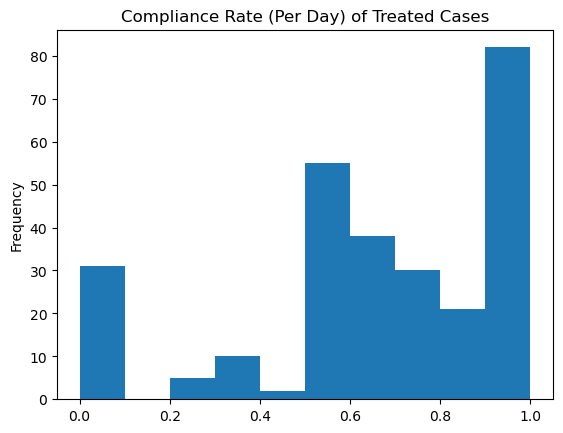

In [356]:
df_norm2 = normalize_agreement(df)

df_comp = df_norm2.groupby(df_norm2["Hearing Date"])['C'].agg(lambda x: list(x.dropna())) #lambda x: list(x.dropna())

#manually calculate mean 
df_comp["mean"] = df_comp.apply(lambda x: np.mean(x))
df_comp["mean"] = df_comp["mean"].fillna(0.0)
#df_comp["mean"] = df_comp.apply(lambda x: list(x.dropna()))

plot = df_plot3.plot(kind='hist', title="Compliance Rate (Per Day) of Treated Cases")
corr_comp = pd.concat([df_treatment["mean"], df_comp["mean"]], axis=1)
corr_comp.columns = ["mean_treatment","mean_complaince"]
#corr_plot = corr_comp.plot(style=".")
print(corr_comp["mean_treatment"].corr(corr_comp["mean_complaince"])) #Same day compliance: 0.25623139939355877 ; t-test ?

print(corr_comp["mean_treatment"][:-1].corr(corr_comp["mean_complaince"].shift(-1)[:-1])) #Next day compliance: 0.24142788800651171

#if not treated, they can't comply so a baseline correlation doesn't mean much -- we can also only calculate compliance for treated cases?

#--> compliance for next treated case [first treated case on the next day]
#--> complaince is higher when treatment is above 0.5 ;  

print(df_comp["mean"].mean()) #0.7069835476769784
plt.savefig('Figs/agreement_per_day_treated.png', bbox_inches='tight')

In [344]:
def run_trial(t, J_dist, res_df): 
    '''
    J_dist -- percentage of treated cases assigned to each judge; accomodates any variable number of judges
    res_df -- dataframe of experiment data with unassigned judge column 
    '''
    res_df = res_df.copy()
    #add an empty judge column 
    res_df["J"] = np.nan #judge assignment 
    res_df["T"] = np.nan #trial number 

    #re-set indices 
    num = len(res_df.index) #total rows
    div = len(J_dist.keys()) #number of judges
    k = [num // div + (1 if x < num % div else 0)  for x in range (div)] #number of values to assign per judge 
    J_idx = dict()
    selected = list()

    curr = 0
    for j in J_dist.keys():
    
        p1 = J_dist[j]  
        p2 = 1.0 - J_dist[j] 

        pop1 = res_df.index[res_df['Z'] == 1.0].tolist()
        w1 = len(pop1)*[p1]
        
        pop2 = res_df.index[res_df['Z'] == 0.0].tolist()
        w2 = len(pop2)*[p2]

        pop = pop1+pop2
        w = w1+w2
    
        pop_dict = dict(zip(pop, w))
        pop_unselected = [x for x in pop if x not in selected]
    
        pop_dict = dict((i, pop_dict[i]) for i in pop_unselected if i in pop_dict)
        w = np.array(list(pop_dict.values()))
        w_final = w/w.sum()

        J_idx[j] = list(np.random.choice(list(pop_dict.keys()),k[curr],replace=False, p=w_final))
    
        curr+= 1
        
        selected += J_idx[j]
        for i in J_idx[j]:
            res_df.at[i, "J"]= j
            res_df.at[i, "T"]= t

    return res_df

In [345]:
def run_trial_alt(t, J_dist, res_df): 
    '''
    J_dist -- percentage of treated cases assigned to each judge; accomodates any variable number of judges
    res_df -- dataframe of experiment data with unassigned judge column 
    '''
    res_df = res_df.copy()
    #add an empty judge column 
    res_df["J"] = np.nan #judge assignment 
    res_df["T"] = np.nan #trial number 

    #re-set indices 
    num = len(res_df.index) #total rows
    div = len(J_dist.keys()) #number of judges
    k = [num // div + (1 if x < num % div else 0)  for x in range (div)] #number of values to assign per judge 
    #print(k)
    
    J_idx = dict()
    
    unselected_z1 = res_df.index[res_df['Z'] == 1.0].tolist()
    unselected_z0 = res_df.index[res_df['Z'] == 0.0].tolist()
    
    len_z1 = len(unselected_z1)
    
    
    curr = 0
    
    for j in J_dist.keys():
    
        p1 = J_dist[j]  #percentage of treated cases to be assigned to this judge 

        
        num_items = int(len_z1*p1) #approximate proportion of z1 to assign to this judge 

        #print("j", p1, num_items)
        #assign those items 
        z1_items = random.sample(unselected_z1, num_items)

        #remaining items to assign for the judge
        num_remaining = k[curr] - num_items

        #assign these remaining items to control 
        if num_remaining < 0:
            z0_items = []
        elif num_remaining <= len(unselected_z0):
            z0_items = random.sample(unselected_z0, num_remaining)
        #if items to assign to control is more than available:
        else:
            diff = num_remaining - len(unselected_z0)
            #assign max items to control 
            z0_items = random.sample(unselected_z0, len(unselected_z0))
            #assign the rest to treatment
            z1_items += unselected_z1 #random.sample(unselected_z1, diff)
        
    
         
        J_idx[j] = z1_items+z0_items

        #update the list of indices 
        unselected_z0 = list(set(unselected_z0) - set(z0_items))
        unselected_z1 = list(set(unselected_z1) - set(z1_items))
        

        for i in J_idx[j]: #place judge value at the index 
            res_df.at[i, "J"]= j
            res_df.at[i, "T"]= t

        
        #print("LOOK:", "idx:", curr, "to assign:", k[curr], "z1:", num_items, len(z1_items), "z0:", num_remaining, len(z0_items), "left of z1:", len(unselected_z1), "left of z0:",len(unselected_z0))
        curr+= 1 #move to the next judge
            
    return res_df

In [346]:
def normalize_outcomes(df):
    '''
    Staff_ReleaseRecommendation -- four-level ordinal variable for the DMF recommendation
    DMF -- binary decision
    
    Any of the negative outcomes (NCA, NVCA, FTA) counts as a negative outcome overall. 
    Any decision beyond release (D = 0) is counted as a decision/ action towards detainment (D = 1). 
    A decision is correct when the action (eg. release, D = 0) matches the actual outcome (eg. Y = 0). 

    Get final decisions and outcomes into binary format. 
    
    '''
    df = df.copy()
    TP=0
    TN=0
    FP=0
    FN=0
    D_norm_list = list()
    Y_list = list()
    D_corr_def_list = list()

    for index, row in df.iterrows():
        if row["Y_NCA"]== 1.0 or row["Y_NVCA"]== 1.0 or row["Y_FTA"]== 1.0:
            Y=1.0
        else:
            Y=0.0
        
        if Y==1.0 and row["DMF"]== 1.0:
            TP+=1
        if Y==0.0 and row["DMF"]== 0.0:
            TN+=1
        if Y==1.0 and row["DMF"]== 0.0:
            FN+=1
        if Y==0.0 and row["DMF"]== 1.0:
            FP+=1

        if row["D"] > 0:
            D_norm = 1.0
        elif row["D"] == 0:
            D_norm = 0.0

        if D_norm == 1:
            D_corr = "U" #detained defendents cannot be reliably observed
        elif D_norm == Y:
            D_corr = 1.0 #if released and did not recidivate or commit a crime 
        else:
            D_corr = 0.0 #if released and did recidivate or commit a crime

        Y_list.append(Y)
        D_norm_list.append(D_norm)
        D_corr_def_list.append(D_corr)
        
    #set a normalized outcome 
    df["Y"] = Y_list
    df["D_norm"] = D_norm_list

    #identify default correct decisions  
    df["D_corr_def"] = D_corr_def_list

    return df 


def calc_acc(df, DMF_id):
    '''
    Calculate the accuracy of a given predictive recommendation with respect to downstream outcomes. 
    
    '''
    df = df.copy()
    TP=0
    TN=0
    FP=0
    FN=0
    D_norm_list = list()
    Y_list = list()
    D_corr_def_list = list()

    for index, row in df.iterrows():
        Y = row["Y"]
        if Y==1.0 and row[DMF_id]== 1.0:
            TP+=1
        if Y==0.0 and row[DMF_id]== 0.0:
            TN+=1
        if Y==1.0 and row[DMF_id]== 0.0:
            FN+=1
        if Y==0.0 and row[DMF_id]== 1.0:
            FP+=1

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy
    
#Original exp data results: Model accruacy -- (0.5367530407191962)

In [347]:
def f1_decision_sim(res_df, J_dist, b_k=0.1, thres=0.6, linear = True, exp_idx = "D_exp1"):
    '''
    Running simulation for treatment exposure model. 

    Note that the manipulatable experiment design choice is treatment assignment. 
    '''
    
    res_df = res_df.copy()
    exp = dict()
    for k in list(J_dist.keys()):
        if k:
            exp[k] = [0, 0, 0, 0]


    D_list = list()
    a = 1-b_k

    J_ik=0

    for index, row in res_df.iterrows():
    #going through all the cases

        #set default decision
        def_ik = row["D_norm"]
        rec_ik = row["DMF"]

        judge_name = row["J"]  # the judge for this case
        #print(judge_name)
        judge_cases_seen = exp[judge_name][1]
        judge_num_treated = exp[judge_name][0]

        if judge_cases_seen == 0:
            J_ik = b_k
        else:
            exp[judge_name][2] = judge_num_treated/judge_cases_seen
            if linear:
                J_ik = b_k + a*(judge_num_treated/judge_cases_seen)  ## linear J_ik model
                
            else:
                # avg exposure to PSA is above threshold, then you comply 
                if (judge_num_treated/judge_cases_seen)  > thres:
                    J_ik = 1 
                else:
                    #not above threshold, do not comply
                    J_ik = 0 #b_k + 0

        
        exp[judge_name][3] = J_ik
        e_ik = np.random.binomial(1, p=J_ik)

        if row["Z"] == 0 : #if untreated 
            
            #default decision is made
            D_list.append(def_ik)  
            
            #only update judge_cases_seen
            exp[judge_name][1] += 1

        else: #if treated 
            
            #update both judge_cases_seen and judge_num_treated
            exp[judge_name][0] += 1
            exp[judge_name][1] += 1
            if e_ik == 1:
                D_list.append(rec_ik) #if you comply, decision = recommended decision
            elif e_ik == 0:
                D_list.append(def_ik) #if you don't comply, go to default decision 

    res_dict = {"exp": exp_idx.split("_")[1], "main var": "None", "$J_{dist}$": J_dist, "$b_k$": b_k, "linear": str(linear), "Results":exp, "threshold":thres}
    print(res_dict)
    res_df[exp_idx] = D_list
    
    return res_df , exp_idx, res_dict

In [348]:
def f2_decision_sim(res_df, J_dist, b_k=0.1, pred_thres=5, cap_thres=0.5, linear=True, exp_idx = "D_exp2"):
    '''
    Running simulation for capacity constraint model. 

    Note that the manipulatable experiment design choice is setting the model recommendation threshold 
    to control the model's positive predictive rate. 
    '''

    res_df = res_df.copy()

    #look at alternative recommendation with different positive predictions
    res_df["DMF_alt_cc"] = np.where(res_df["Staff_ReleaseRecommendation"] > pred_thres, 1.0, 0.0) 
    #Note: higher threshold for less positive recommendation
    
    exp = dict()
    for k in list(J_dist.keys()):
        if k:
            exp[k] = [0, 0, 0, 0, 0]


    D_list = list()
    a = b_k

    J_ik=0

    for index, row in res_df.iterrows():
    #going through all the cases

        #set default decision
        def_ik = row["D_norm"]
        #set recommended decision
        rec_ik = row["DMF_alt_cc"]


        judge_name = row["J"]  # the judge for this case
        pos_num = exp[judge_name][2] #num positive cases each judge has seen 
        judge_cases_seen = exp[judge_name][1] #num total cases seen 
        judge_num_treated = exp[judge_name][0] #num treated cases
        
        if judge_cases_seen == 0:
            J_ik = b_k
        else:
            exp[judge_name][3] = pos_num/judge_cases_seen
            if linear:
                J_ik = b_k - a*(pos_num/judge_cases_seen)  ## linear J_ik
            else:
                # rate of exposure to positive cases is below threshold, then you comply 
                if (pos_num/judge_cases_seen)  < cap_thres:
                    J_ik = 1 
                else:
                    #if above the cap then they should not comply 
                    J_ik = 0 

        exp[judge_name][4] = J_ik
        e_ik = np.random.binomial(1, p=J_ik)

        if row["Z"] == 0 :
            D_list.append(def_ik)
            exp[judge_name][1] += 1

        else:
            exp[judge_name][0] += 1
            exp[judge_name][1] += 1
            if rec_ik > 0:
                exp[judge_name][2] += 1
                
            if e_ik == 1:
                D_list.append(rec_ik)
            elif e_ik == 0:
                D_list.append(def_ik)

    res_dict = {"exp":  exp_idx.split("_")[1], "main var": pred_thres, "$J_{dist}$": J_dist, "$b_k$": b_k, "linear": str(linear), "Results":exp, "threshold":cap_thres}
    print(res_dict)
    res_df[exp_idx] = D_list
    
    return res_df , exp_idx, res_dict

In [349]:
def generate_alt_DMF_acc(res_df, acc_boost=0.5):
    '''
    Generating alternative model recommendations, based on an accuracy boost from the default. 

    Note: acc_boost at 1 is going to give perfectly accurate recommendations; acc_boost at 0 won't change anything from default DMF model 

    Note that a decision is considered correct when the action (eg. release, D = 0) matches the actual outcome (eg. Y = 0), 
    so we boost accuracy by assigning the correct recommendation to a random subset of incorrect default decisions. 
    '''    
    
    res_df = res_df.copy()
    rdf = normalize_outcomes(res_df)
    DMF_acc = calc_acc(rdf, "DMF")

    DMF_alt_acc = list()
    for index, row in rdf.iterrows():
        flip_score = np.random.binomial(1, p=acc_boost)
        if row["DMF"] != row["Y"]:
            if flip_score:
                DMF_alt_acc.append(row["Y"])
            else:
                DMF_alt_acc.append(row["DMF"])
        else:
            DMF_alt_acc.append(row["DMF"])
 

    rdf["DMF_alt_acc"] = DMF_alt_acc
    DMF_alt_acc = calc_acc(rdf, "DMF_alt_acc")


    return rdf, DMF_acc, DMF_alt_acc

In [350]:
def f3_decision_sim(res_df, J_dist, b_k=0.1, acc_boost=0.5, thres=0.5, linear=True, exp_idx = "D_exp3"):
    '''
    Running simulation for low trust model. 

    Note that the manipulatable experiment design choice is model recommendation accuracy.
    '''    

    res_df = res_df.copy()
    res_df, DMF_acc, DMF_alt_acc = generate_alt_DMF_acc(res_df, acc_boost)
    
    exp = dict()
    for k in list(J_dist.keys()):
        if k:
            exp[k] = [0, 0, 0, 0, 0]


    D_list = list()
    a = b_k

    J_ik=0


    for index, row in res_df.iterrows():
    #going through all the cases

        #set default decision
        def_ik = row["D_norm"]
        rec_ik = row["DMF_alt_acc"]


        judge_name = row["J"]  # the judge for this case
        incorr_num = exp[judge_name][2] #num incorrect predictions each judge has seen 
        judge_cases_seen = exp[judge_name][1]
        judge_num_treated = exp[judge_name][0]
        

        if judge_cases_seen == 0:
            J_ik = b_k
        else:
            exp[judge_name][3] = incorr_num/judge_cases_seen
            if linear:
                J_ik = b_k - a*(incorr_num/judge_cases_seen)  # linear 
            else:
                if (incorr_num/judge_cases_seen)  < thres:
                    #if error is below threshold, then comply 
                    J_ik = 1 #non-linear
                else:
                    #if avg exposure to incorrect recommendation is above threshold, don't comply 
                    J_ik = 0 
            
        exp[judge_name][4] = J_ik
        e_ik = np.random.binomial(1, p=J_ik)

        if rec_ik != row["Y"]:
            wrong = True
        else:
            wrong = False 

        if row["Z"] == 0 :
            D_list.append(def_ik)
            exp[judge_name][1] += 1

        else:
            exp[judge_name][0] += 1
            exp[judge_name][1] += 1
            if wrong:
                exp[judge_name][2] += 1 #look at wrong prediction for treated cases
                
            if e_ik == 1:
                D_list.append(rec_ik)
            elif e_ik == 0:
                D_list.append(def_ik)

    res_dict = {"exp": exp_idx.split("_")[1], "main var": acc_boost, "$J_{dist}$": J_dist, "$b_k$": b_k, "linear": str(linear), "Results":exp, "threshold":thres}
    print(res_dict)
    res_df[exp_idx] = D_list
    
    
    return res_df, exp_idx, res_dict

In [351]:
def calc_corr_decisions(df, D_label):
    '''
    Identify correct decisions. 

    Note that a decision is considered correct when the action (eg. release, D = 0) matches the actual outcome (eg. Y = 0). 
    '''
    df = df.copy() 
    D_corr_list = list()

    for index, row in df.iterrows():
        if row[D_label] == 1:
            D_corr = "U" #detained defendents cannot be reliably observed
        elif row["Y"] == row[D_label]:
            D_corr = 1.0 #if released and did not recidivate or commit a crime 
        else:
            D_corr = 0.0 #if released and did recidivate or commit a crime 

        D_corr_list.append(D_corr)

    #identify correct decisions  
    df["D_corr"] = D_corr_list

    return df 

In [331]:
##Experiment 1 

#Run 1000 trials of simulation for each scenario and bsave to a csv
#Demo: Run 10 trials 

results_folder = "Results/Experiment_1/"

n_trials = 100
J_scenarios = [{"J1": 0.6, "J2": 0.1, "J3": 0.3}, {"J1": 0.333, "J2": 0.333, "J3": 0.333}, {"J1": 0.5, "J2": 0.5}, {"J1": 0.999999999, "J2": 0.0000001}]
res_table = list()

for J_dist in J_scenarios:
    all_res = list()
    scenario_name = str()
    
    for v in J_dist.values():
        scenario_name = scenario_name+"_"+str(v)
     
    
    for i in range (1, n_trials+1):
        #t_res = run_trial(i, J_dist, res_df_exp_data)
        t_res = run_trial_alt(i, J_dist, res_df_exp_data)
        all_res.append(t_res)

    exp_df = pd.concat(all_res)
    exp_df = normalize_outcomes(exp_df)
    b_k = 0.4
    thres = 0.6
    
    print(J_dist)
    exp_df, exp_idx, res_dict = f1_decision_sim(exp_df, J_dist, b_k, thres, True) #linear ; baseline 60% compliance, threshold at 50% treated
    exp_df = calc_corr_decisions(exp_df, exp_idx)
    res_table.append(res_dict)
    exp_df.to_csv(results_folder+exp_idx+"_summary"+scenario_name+"_t"+str(n_trials)+"_bk="+str(b_k)+"_thres="+str(thres)+"_alt.csv")

    exp_df, exp_idx, res_dict = f1_decision_sim(exp_df, J_dist, b_k, thres, False) #non-linear 
    exp_df = calc_corr_decisions(exp_df, exp_idx)
    res_table.append(res_dict)
    exp_df.to_csv(results_folder+exp_idx+"_summary"+scenario_name+"_t"+str(n_trials)+"_bk="+str(b_k)+"_thres="+str(thres)+"_non_linear_alt.csv")

res_table_df = pd.DataFrame(res_table)
res_table_df.to_csv(results_folder+exp_idx+"_table_t"+str(n_trials)+"_bk="+str(b_k)+"_thres="+str(thres)+"_alt.csv")

{'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
{'exp': 'exp1', 'main var': 'None', '$J_{dist}$': {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}, '$b_k$': 0.4, 'linear': 'True', 'Results': {'J1': [56800, 63100, 0.9001568963058052, 0.9400941377834832], 'J2': [9400, 63000, 0.14920871759869203, 0.48952523055921526], 'J3': [28600, 63000, 0.4539595866601057, 0.6723757519960634]}, 'threshold': 0.6}
{'exp': 'exp1', 'main var': 'None', '$J_{dist}$': {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}, '$b_k$': 0.4, 'linear': 'False', 'Results': {'J1': [56800, 63100, 0.9001568963058052, 1], 'J2': [9400, 63000, 0.14920871759869203, 0], 'J3': [28600, 63000, 0.4539595866601057, 0]}, 'threshold': 0.6}
{'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
{'exp': 'exp1', 'main var': 'None', '$J_{dist}$': {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}, '$b_k$': 0.4, 'linear': 'True', 'Results': {'J1': [31500, 63100, 0.4991996703592767, 0.699519802215566], 'J2': [31500, 63000, 0.5000079366339149, 0.7000047619803489], 'J3': [31800, 63000, 0.5047540437149796, 0.702852

In [332]:
## Experiment 2 

#Run 1000 trials of simulation for each treatment assignment scenario; and each threshold level then save to a csv
#Demo: Run 10 trials

results_folder = "Results/Experiment_2/"

n_trials = 100
J_scenarios = [{"J1": 0.6, "J2": 0.1, "J3": 0.3}, {"J1": 0.333, "J2": 0.333, "J3": 0.333}, {"J1": 0.5, "J2": 0.5}, {"J1": 0.999999999, "J2": 0.0000001}]
res_table = list()

for J_dist in J_scenarios:
    all_res = list()
    scenario_name = str()
    
    for v in J_dist.values():
        scenario_name = scenario_name+"_"+str(v)
     
    
    for i in range (1, n_trials+1):
        t_res = run_trial_alt(i, J_dist, res_df_exp_data)
        all_res.append(t_res)

    exp_df = pd.concat(all_res)
    exp_df = normalize_outcomes(exp_df)
    b_k = 0.6
    thres = 0.15
    
    for i in range(3,7):
        print(i, J_dist)
        exp_df, exp_idx, res_dict = f2_decision_sim(exp_df, J_dist, b_k, i, thres, True, "D_exp2") #linear
        exp_df = calc_corr_decisions(exp_df, exp_idx)
        res_table.append(res_dict)
        
        exp_df.to_csv(results_folder+exp_idx+"_summary"+scenario_name+"_t"+str(n_trials)+"_bk="+str(b_k)+"_thres="+str(thres)+"_"+str(i)+"_alt.csv")
        
        exp_df, exp_idx, res_dict = f2_decision_sim(exp_df, J_dist, b_k, i, thres, False, "D_exp2") #non-linear
        exp_df = calc_corr_decisions(exp_df, exp_idx)
        res_table.append(res_dict)
        
        exp_df.to_csv(results_folder+exp_idx+"_summary"+scenario_name+"_t"+str(n_trials)+"_bk="+str(b_k)+"_thres="+str(thres)+"_"+str(i)+"_non_linear_alt.csv")

res_table_df = pd.DataFrame(res_table)
res_table_df.to_csv(results_folder+exp_idx+"_table_t"+str(n_trials)+"_bk="+str(b_k)+"_thres="+str(thres)+"_alt.csv")

3 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
{'exp': 'exp2', 'main var': 3, '$J_{dist}$': {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}, '$b_k$': 0.6, 'linear': 'True', 'Results': {'J1': [56800, 63100, 20023, 0.3173108924071697, 0.40961346455569814], 'J2': [9400, 63000, 3352, 0.0532071937649804, 0.5680756837410117], 'J3': [28600, 63000, 10125, 0.16071683677518692, 0.5035698979348878]}, 'threshold': 0.15}
{'exp': 'exp2', 'main var': 3, '$J_{dist}$': {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}, '$b_k$': 0.6, 'linear': 'False', 'Results': {'J1': [56800, 63100, 20023, 0.3173108924071697, 0], 'J2': [9400, 63000, 3352, 0.0532071937649804, 1], 'J3': [28600, 63000, 10125, 0.16071683677518692, 0]}, 'threshold': 0.15}
4 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
{'exp': 'exp2', 'main var': 4, '$J_{dist}$': {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}, '$b_k$': 0.6, 'linear': 'True', 'Results': {'J1': [56800, 63100, 15270, 0.2419848175089938, 0.45480910949460374], 'J2': [9400, 63000, 2528, 0.04012762107335037, 0.5759234273559898], 'J3': [28600, 6

In [352]:
## Experiment 3 

#Run 1000 trials of simulation for each scenario; and each accuracy boost level then save to a csv
#Demo: Run 10 trials

results_folder = "Results/Experiment_3/"

n_trials = 100
J_scenarios = [{"J1": 0.6, "J2": 0.1, "J3": 0.3}, {"J1": 0.333, "J2": 0.333, "J3": 0.333}, {"J1": 0.5, "J2": 0.5}, {"J1": 0.999999999, "J2": 0.0000001}]
res_table = list()

for J_dist in J_scenarios:
    all_res = list()
    scenario_name = str()
    
    for v in J_dist.values():
        scenario_name = scenario_name+"_"+str(v)
     
    #assign treatment 
    for i in range (1, n_trials+1):
        t_res = run_trial(i, J_dist, res_df_exp_data)
        all_res.append(t_res)

    exp_df = pd.concat(all_res)
    exp_df = normalize_outcomes(exp_df)
    b_k = 0.6
    thres = 0.15
    
    for i in np.arange(0, 1.1, 0.1):
        i = round(i,1)
        print(i, J_dist)
        exp_df, exp_idx, res_dict = f3_decision_sim(exp_df, J_dist, b_k, i, thres, True, "D_exp3") #linear
        exp_df = calc_corr_decisions(exp_df, exp_idx)
        res_table.append(res_dict)
        
        exp_df.to_csv(results_folder+exp_idx+"_summary"+scenario_name+"_t"+str(n_trials)+"_bk="+str(b_k)+"_thres="+str(thres)+"_"+str(i)+"_alt.csv")

        exp_df, exp_idx, res_dict = f3_decision_sim(exp_df, J_dist, b_k, i, thres, False, "D_exp3") #non-linear
        exp_df = calc_corr_decisions(exp_df, exp_idx)
        res_table.append(res_dict)
        
        exp_df.to_csv(results_folder+exp_idx+"_summary"+scenario_name+"_t"+str(n_trials)+"_bk="+str(b_k)+"_thres="+str(thres)+"_"+str(i)+"_non_linear_alt.csv")

res_table_df = pd.DataFrame(res_table)
res_table_df.to_csv(results_folder+exp_idx+"_table_t"+str(n_trials)+"_bk="+str(b_k)+"_thres="+str(thres)+"_alt.csv")

0.0 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
{'exp': 'exp3', 'main var': 0.0, '$J_{dist}$': {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}, '$b_k$': 0.6, 'linear': 'True', 'Results': {'J1': [36806, 63100, 17262, 0.27355425601039635, 0.4358674463937622], 'J2': [9295, 63000, 4410, 0.07000111112874807, 0.5579993333227511], 'J3': [48699, 63000, 22828, 0.36235495801520656, 0.38258702519087606]}, 'threshold': 0.15}
{'exp': 'exp3', 'main var': 0.0, '$J_{dist}$': {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}, '$b_k$': 0.6, 'linear': 'False', 'Results': {'J1': [36806, 63100, 17262, 0.27355425601039635, 0], 'J2': [9295, 63000, 4410, 0.07000111112874807, 1], 'J3': [48699, 63000, 22828, 0.36235495801520656, 0]}, 'threshold': 0.15}
0.1 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
{'exp': 'exp3', 'main var': 0.1, '$J_{dist}$': {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}, '$b_k$': 0.6, 'linear': 'True', 'Results': {'J1': [36806, 63100, 15589, 0.24704036514049352, 0.45177578091570386], 'J2': [9295, 63000, 3974, 0.06308036635502151, 0.5621517801869871], 

In [123]:
source = ["/Users/inioluwaraji/Downloads/exp-design-human-decisions/Results/Experiment_1/D_exp1_table_t10_alt.csv", "/Users/inioluwaraji/Downloads/exp-design-human-decisions/Results/Experiment_2/D_exp2_table_t10_alt.csv", "/Users/inioluwaraji/Downloads/exp-design-human-decisions/Results/Experiment_3/D_exp3_table_t10_alt.csv"]
for item in source:
    df = pd.read_csv(item)

    latex_table = df.to_latex(index=False)
    print(latex_table)

\begin{tabular}{rlrlrrlrr}
\toprule
Unnamed: 0 & exp & main var & $J_{dist}$ & $b_k$ & linear & rate & threshold & $J_{ik}$ \\
\midrule
0 & exp1 & NaN & {'J1': 0.6, 'J2': 0.1, 'J3': 0.3} & 0.600000 & True & {'J1': [3689, 6310, 0.5845617372008243], 'J2': [943, 6300, 0.149547547229719], 'J3': [4848, 6300, 0.7694872201936815]} & 0.500000 & 0.833825 \\
1 & exp1 & NaN & {'J1': 0.6, 'J2': 0.1, 'J3': 0.3} & 0.600000 & False & {'J1': [3689, 6310, 0.5845617372008243], 'J2': [943, 6300, 0.149547547229719], 'J3': [4848, 6300, 0.7694872201936815]} & 0.500000 & 1.000000 \\
2 & exp1 & NaN & {'J1': 0.333, 'J2': 0.333, 'J3': 0.333} & 0.600000 & True & {'J1': [2279, 6310, 0.3612299889047393], 'J2': [2834, 6300, 0.4497539291951103], 'J3': [4367, 6300, 0.6931258929988887]} & 0.500000 & 0.779902 \\
3 & exp1 & NaN & {'J1': 0.333, 'J2': 0.333, 'J3': 0.333} & 0.600000 & False & {'J1': [2279, 6310, 0.3612299889047393], 'J2': [2834, 6300, 0.4497539291951103], 'J3': [4367, 6300, 0.6931258929988887]} & 0.500000 